<a href="https://colab.research.google.com/github/Kitiksha1000/Wine-quality-prediction/blob/main/Wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the Data

In [ ]:
data_url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data=pd.read_csv(data_url,sep=";")

# Examine the Data

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
feature_list=data.columns[:-1].values
labels=[data.columns[-1]]
print(feature_list)
print(labels)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
['quality']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


Higher value-> better wine quality

**Observation**-
1.   Quality values are between 3 and 8 in this dataset.
2.   Most of the wines are of average quality(5 and 6)




**Histogram of wine quality v/s count**




Text(0, 0.5, 'Count')

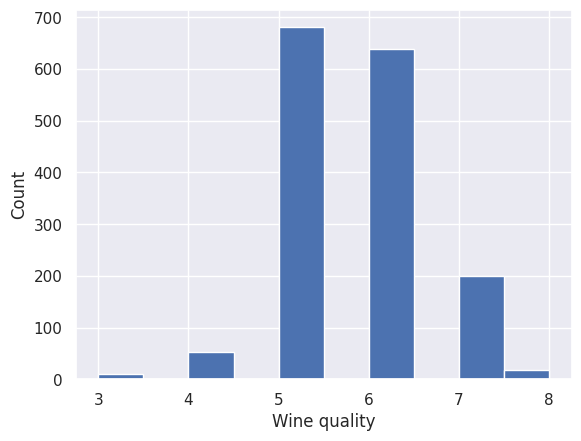

In [ ]:
sns.set()
data['quality'].hist()
plt.xlabel('Wine quality')
plt.ylabel('Count')

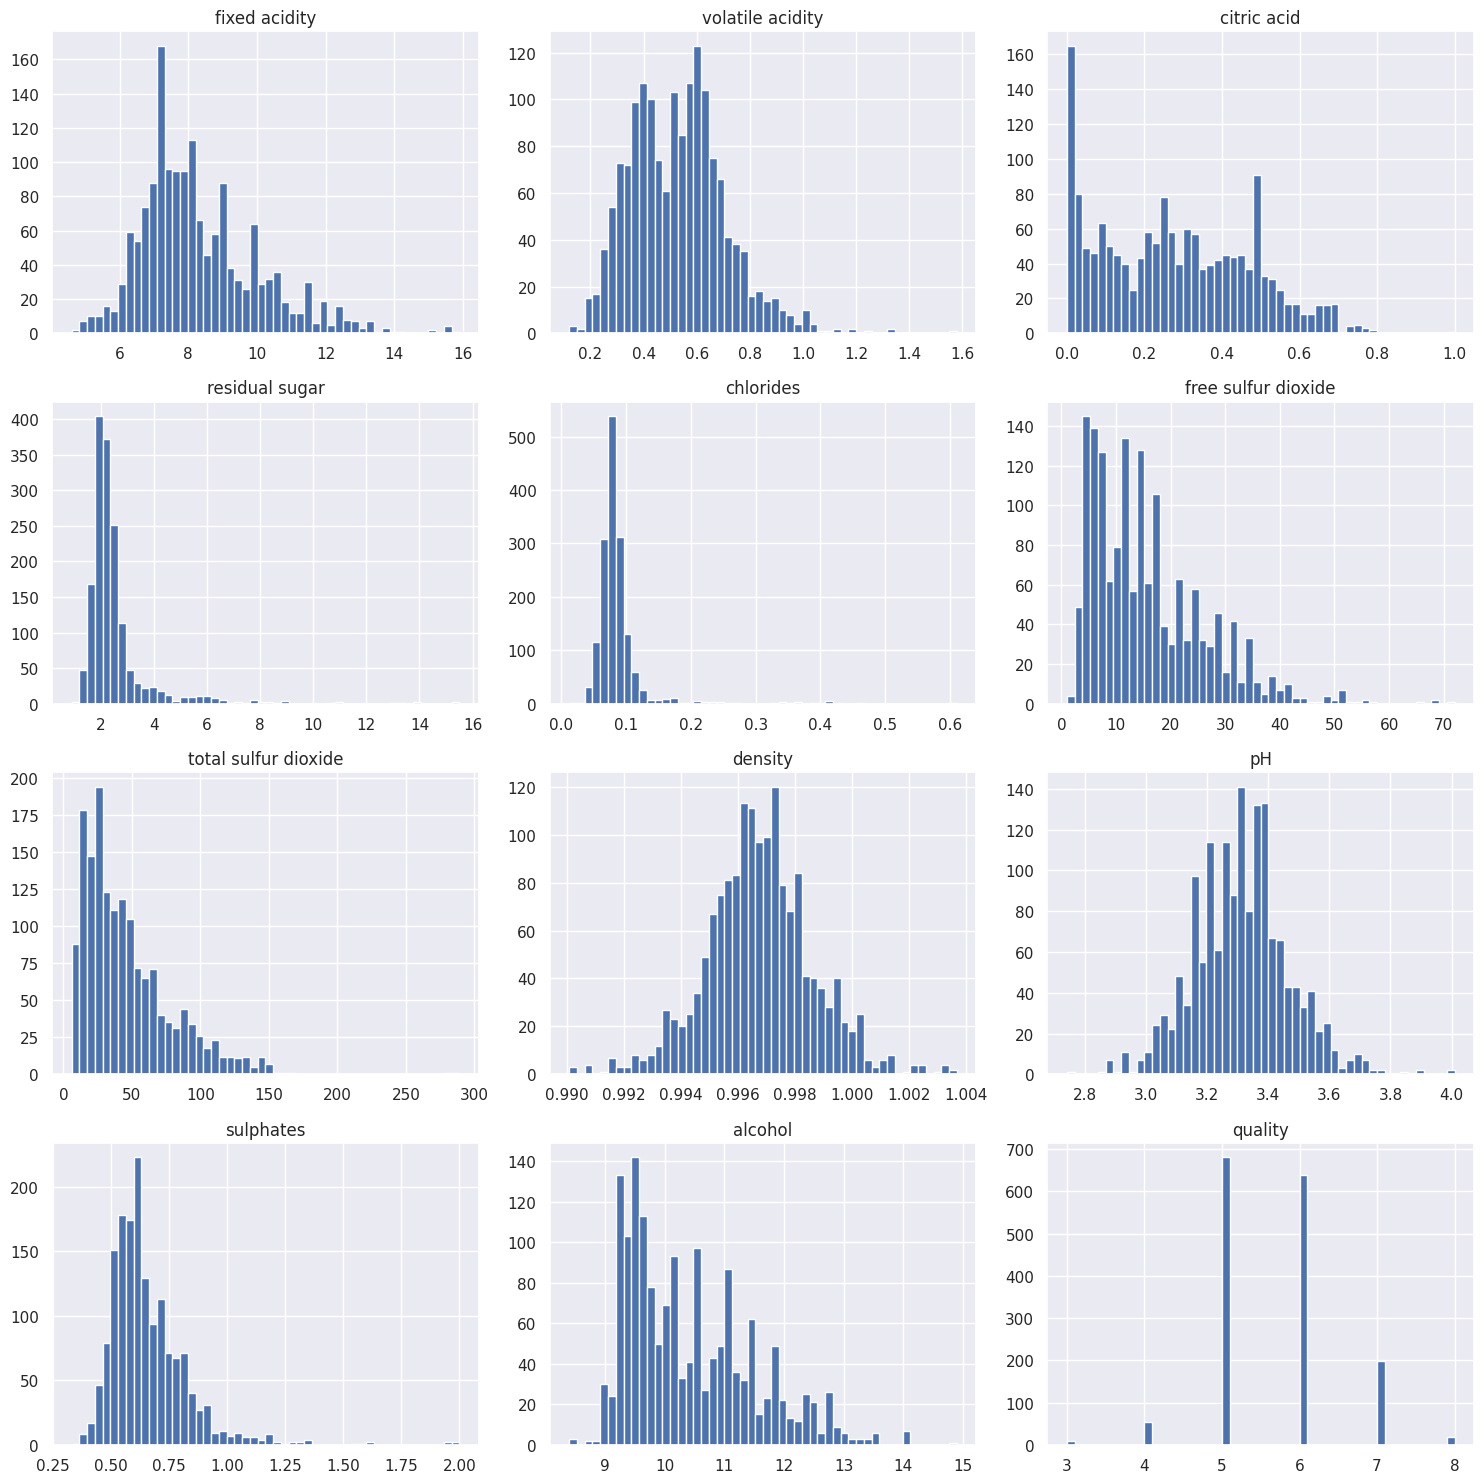

In [ ]:
plt.figure(figsize=(15,15))
for i, col in enumerate(data.columns):
    plt.subplot(4,3,i+1)
    data[col].hist(bins=50)
    plt.title(col)
plt.tight_layout()
plt.show()

**Observations:-**


1.   Features have different scales
2.   Features have different distributions:


*   Some are tail heavy (Ex:-residual sugar, free SO2 etc)

*   A few have multiple modes( Ex:- Volatile acitdity, citric acid)








# Train and test data split

**Random Sampling**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

But, our dataset is not uniform! So, random sampling may cause biases in test data.

**Stratified Sampling**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
?StratifiedShuffleSplit

In [ ]:
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for(train_index, test_index) in split.split(data, data['quality']):
  strat_train_set=data.loc[train_index]
  strat_test_set=data.loc[test_index]

**Comparing the overall distribution with stratified sampling**

In [ ]:
overall_dist=data['quality'].value_counts()/len(data) # gives the proportion of each wine quality in the original dataset


In [ ]:
strat_dist=strat_test_set['quality'].value_counts()/len(strat_test_set)
dist_comparison = pd.DataFrame({'Overall': overall_dist, 'Stratified': strat_dist})
perc_diff = (dist_comparison['Overall'] - dist_comparison['Stratified']) * 100
dist_comparison['perc_diff(s-o)'] = perc_diff
dist_comparison


,Overall,Stratified,perc_diff(s-o)
quality,,,
5,0.425891,0.425000,0.089118
6,0.398999,0.400000,-0.100063
7,0.124453,0.125000,-0.054722
4,0.033146,0.034375,-0.122928
8,0.011257,0.009375,0.188204
3,0.006254,0.006250,0.000391


**Now, comparing the overall distribution with random sampling**

In [ ]:
rand_dist = test_set['quality'].value_counts()/len(test_set)
dist_comparison_rand = pd.DataFrame({'Overall': overall_dist, 'Random': rand_dist})
perc_diff = (dist_comparison_rand['Overall'] - dist_comparison_rand['Random']) * 100
dist_comparison['Random']=rand_dist
dist_comparison['perc_diff(r-o)'] = perc_diff
dist_comparison = dist_comparison[['Overall',  'Stratified', 'Random', 'perc_diff(s-o)', 'perc_diff(r-o)']]
dist_comparison

,Overall,Stratified,Random,perc_diff(s-o),perc_diff(r-o)
quality,,,,,
5,0.425891,0.425000,0.406250,0.089118,1.964118
6,0.398999,0.400000,0.412500,-0.100063,-1.350063
7,0.124453,0.125000,0.131250,-0.054722,-0.679722
4,0.033146,0.034375,0.031250,-0.122928,0.189572
8,0.011257,0.009375,0.015625,0.188204,-0.436796
3,0.006254,0.006250,0.003125,0.000391,0.312891


In [ ]:
dist_comparison.loc[:,['perc_diff(s-o)','perc_diff(r-o)']]

,perc_diff(s-o),perc_diff(r-o)
quality,,
5,0.089118,1.964118
6,-0.100063,-1.350063
7,-0.054722,-0.679722
4,-0.122928,0.189572
8,0.188204,-0.436796
3,0.000391,0.312891


**Conclusion**-  Startified sampling gives much accurate representation of the overall distribution than random sampling







---



# Data visualization

**Scatter plot of fixed acidity v/s density**

In [ ]:
exploration_set=strat_train_set.copy()

<Axes: xlabel='fixed acidity', ylabel='density'>

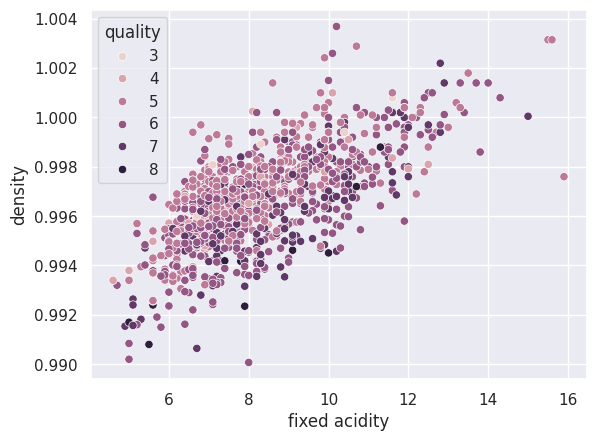

In [ ]:
sns.scatterplot(x='fixed acidity', y='density', hue='quality', data=exploration_set)

**Correlation matrix**

In [ ]:
corr_matrix=exploration_set.corr()
corr_matrix['quality']

,quality
fixed acidity,0.107940
volatile acidity,-0.383249
citric acid,0.210802
residual sugar,0.003710
chlorides,-0.120231
free sulfur dioxide,-0.048291
total sulfur dioxide,-0.194511
density,-0.193009
pH,-0.052063
sulphates,0.228050


**Visualizing correlation matrix using heatmap**

<Axes: >

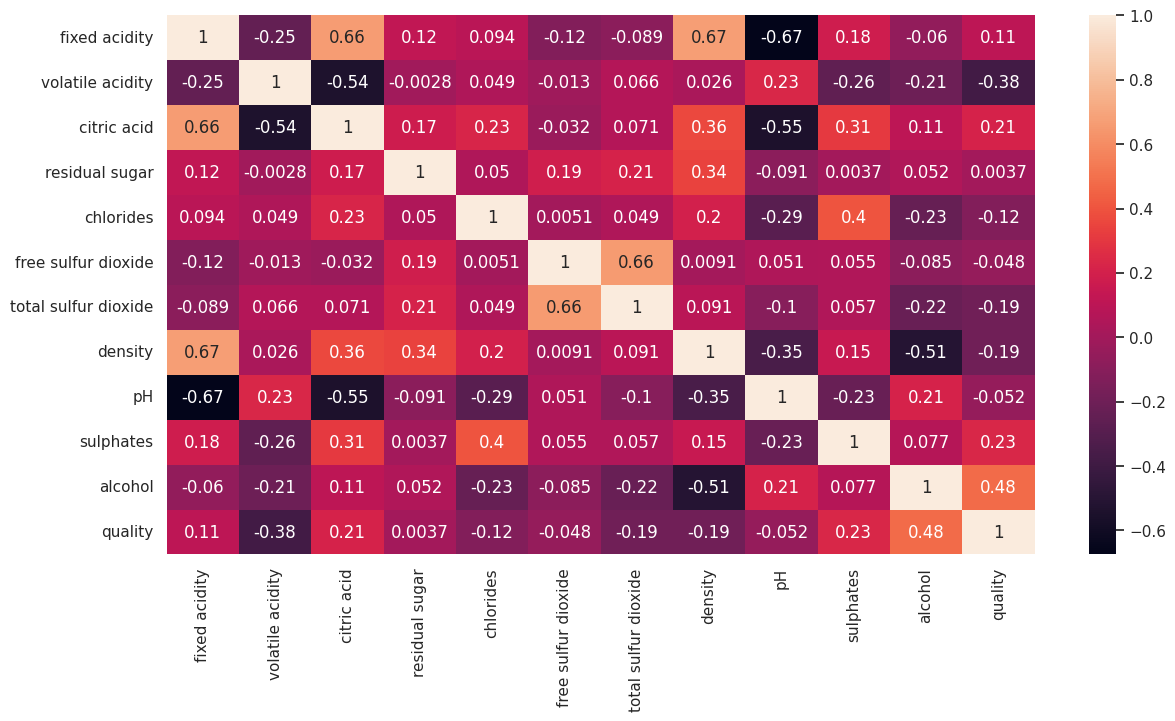

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)

**Scatter matrix of some features**

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='volatile acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='citric acid'>,
        <Axes: xlabel='volatile acidity', ylabel='citric acid'>,
        <Axes: xlabel='citric acid', ylabel='citric acid'>,
        <Axes: xlabel='residual sugar', ylabel='citric acid'>],
       [<Axes: xlabel='fixed acidity', ylabel='residual sugar'>,
        <Axes: xlabel='volatile acidity', ylabel='residual sugar'>,
        <Axes: xlabel='citric acid', ylabel='residual sugar'>,
        <Axes: xlabel='

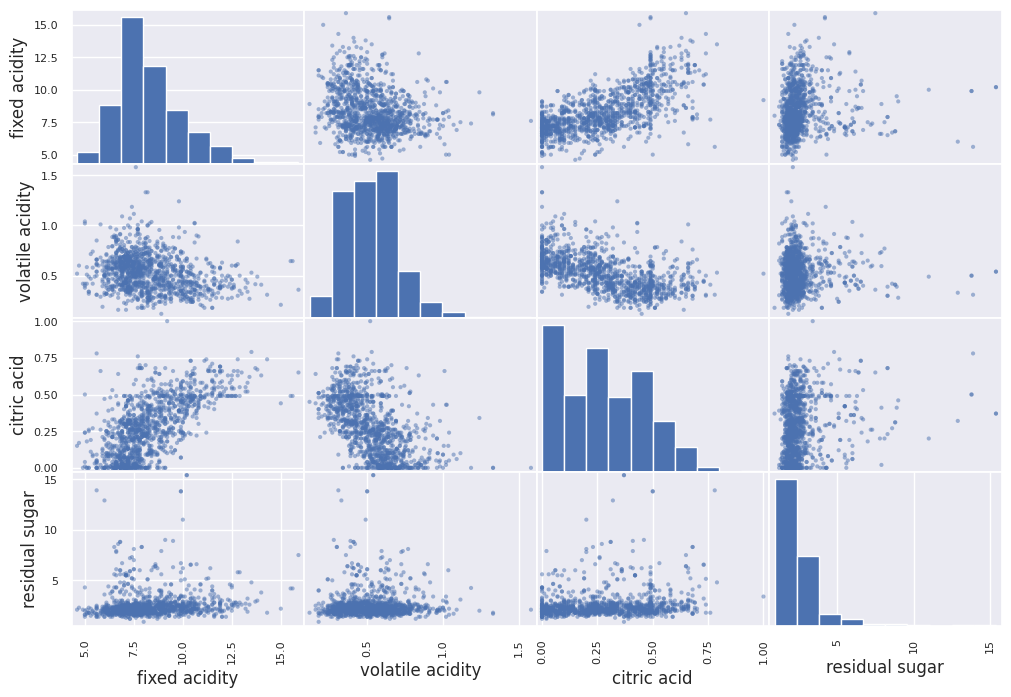

In [ ]:
from pandas.plotting import scatter_matrix
attribute_list = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']
scatter_matrix(exploration_set[attribute_list], figsize=(12,8))

# Data Preparation

In [ ]:
wine_features=strat_train_set.drop('quality', axis=1)
wine_labels=strat_train_set['quality'].copy()

**Checking for missing values**

In [ ]:
wine_features.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**Replacing missing values(**not required in this dataset**)**

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median') #missing values are replaced by median
imputer.fit(wine_features)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

In [ ]:
wine_features.median()

,0
fixed acidity,7.90000
volatile acidity,0.52000
citric acid,0.26000
residual sugar,2.20000
chlorides,0.08000
free sulfur dioxide,14.00000
total sulfur dioxide,39.00000
density,0.99675
pH,3.31000
sulphates,0.62000


In [ ]:
tr_features=imputer.transform(wine_features)

In [ ]:
wine_features_tr=pd.DataFrame(tr_features, columns=wine_features.columns)


In [ ]:
wine_features_tr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.7,0.855,0.02,1.90,0.064,29.0,38.0,0.99472,3.30,0.56,10.75
1,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50
2,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.70
3,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.20
4,10.4,0.260,0.48,1.90,0.066,6.0,10.0,0.99724,3.33,0.87,10.90
...,...,...,...,...,...,...,...,...,...,...,...
1274,8.9,0.480,0.53,4.00,0.101,3.0,10.0,0.99586,3.21,0.59,12.10
1275,6.4,0.570,0.14,3.90,0.070,27.0,73.0,0.99669,3.32,0.48,9.20
1276,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.30
1277,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.20


**Feature Scaling**

**Transformation Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
transform_pipeline=Pipeline([('imputer', SimpleImputer(strategy='median')),('std_scaler', StandardScaler()),])
wine_features_tr=transform_pipeline.fit_transform(wine_features)

The pipeline does two things:

1.   Missing value imputation
2.   Standardization


# Select and Train ML model

**Selecting a baseline model- Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(wine_features_tr,wine_labels)

LinearRegression()

**Evaluating the linear regression model**

In [ ]:
from sklearn.metrics import mean_squared_error
quality_predictions=lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)


0.4206571060060278

MSE for training set= 0.42

In [ ]:
wine_features_test=strat_test_set.drop('quality', axis=1)
wine_labels_test=strat_test_set['quality'].copy()

#apply transformations
wine_features_test_tr=transform_pipeline.fit_transform(wine_features_test)

#call predict function and calculate MSE
quality_test_predictions=lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.3975913087501519

MSE for test set= 0.39

**Visualizing errors between actual and redicted values**

Text(0, 0.5, 'Predicted')

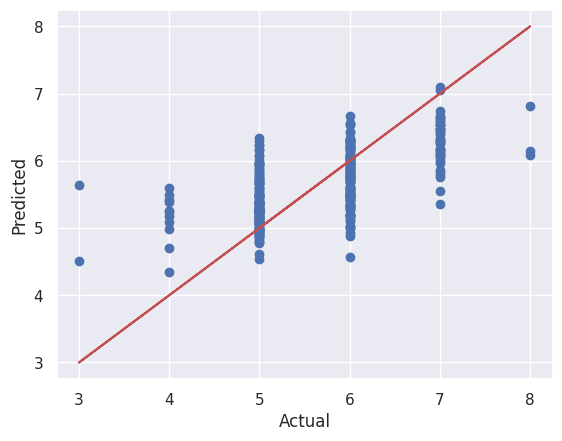

In [ ]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test,wine_labels_test,'r-')
plt.xlabel('Actual')
plt.ylabel('Predicted')

**Conclusion**-The Linear regression models seems to be making erros in predicting poor and best quality wines.

**Selecting another model- Decision tree regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(wine_features_tr, wine_labels)

DecisionTreeRegressor()

**Evaluating Decision Tree regressor model**

In [ ]:
quality_predictions=tree_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.0

Train error=0

In [ ]:
quality_test_predictions=tree_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.628125

Test error= 0.58

**Conclusion**- Decision Tree regressor causes overfitting

Text(0, 0.5, 'Predicted')

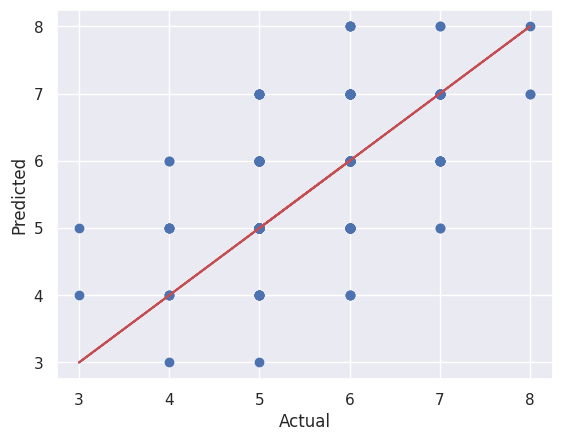

In [ ]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test,wine_labels_test,'r-')
plt.xlabel('Actual')
plt.ylabel('Predicted')

**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
def display_score(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())


**Linear Regression CV**

In [ ]:
scores=cross_val_score(lin_reg, wine_features_tr, wine_labels, scoring='neg_mean_squared_error', cv=10)
lin_reg_mse_scores=-scores
display_score(lin_reg_mse_scores)

Scores: [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]
Mean: 0.431639217212196
Standard deviation: 0.08356359730413968


**Decision Tree CV**

In [ ]:
scores=cross_val_score(tree_reg, wine_features_tr, wine_labels, scoring='neg_mean_squared_error', cv=10)
tree_reg_mse_scores=-scores
display_score(tree_reg_mse_scores)

Scores: [0.578125   0.7109375  0.6015625  0.5859375  0.453125   0.59375
 0.59375    0.7421875  0.84375    1.00787402]
Mean: 0.6710999015748031
Standard deviation: 0.15168283713326255


**Conclusion**:- Linear Regression has better fit and is more precise than DT.

**Random Forest Regressor Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(wine_features_tr, wine_labels)

scores=cross_val_score(forest_reg, wine_features_tr, wine_labels, scoring='neg_mean_squared_error', cv=10)
forest_reg_mse_scores=-scores
display_score(forest_reg_mse_scores)

Scores: [0.38357812 0.41684688 0.28861719 0.33018437 0.21594609 0.29062813
 0.26999922 0.38117187 0.44088438 0.47181339]
Mean: 0.34896696358267715
Standard deviation: 0.07855672020723932


In [ ]:
quality_test_predictions=forest_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.33861468749999996

MSE for test set=0.34

Text(0, 0.5, 'Predicted')

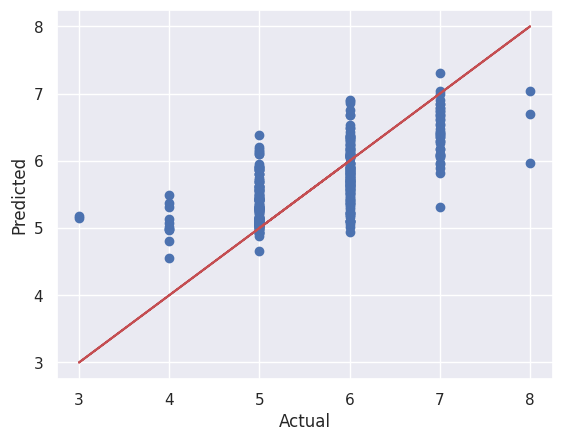

In [ ]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test,wine_labels_test,'r-')
plt.xlabel('Actual')
plt.ylabel('Predicted')

**Conclusion**- The RF modelis better than LR and DT model but it still doesn't predict poor and best quality wines that well

# Fine Tuning ML Model

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

Considering Random Forest Hyperparameters like **Bootstrap, Number of estimators and Maximum number of features**

In [ ]:
param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

Creating an object of Grid Search CV

In [ ]:
grid_search=GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [ ]:
grid_search.fit(wine_features_tr, wine_labels)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [ ]:
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)

0.6829289513663768 {'max_features': 2, 'n_estimators': 3}
0.6194251119891291 {'max_features': 2, 'n_estimators': 10}
0.5937363689525793 {'max_features': 2, 'n_estimators': 30}
0.6825500153252355 {'max_features': 4, 'n_estimators': 3}
0.6164926142155743 {'max_features': 4, 'n_estimators': 10}
0.6014335577155677 {'max_features': 4, 'n_estimators': 30}
0.6990213552673664 {'max_features': 6, 'n_estimators': 3}
0.6260701622336076 {'max_features': 6, 'n_estimators': 10}
0.6015153001529411 {'max_features': 6, 'n_estimators': 30}
0.6721015191693267 {'max_features': 8, 'n_estimators': 3}
0.6213054774613929 {'max_features': 8, 'n_estimators': 10}
0.6051028272192377 {'max_features': 8, 'n_estimators': 30}
0.6634032154374315 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.5991553746651999 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.6837461888468025 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.6178847435991189 {'bootstrap': False, 'max_features': 3, 'n

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30)

**Analysis of Best model and its errors**

In [ ]:
feature_importances=grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances,feature_list),reverse=True)

[(0.16829203938735443, 'alcohol'),
 (0.1376524667923598, 'sulphates'),
 (0.1183715083880224, 'volatile acidity'),
 (0.09200569956734078, 'density'),
 (0.08700070414261772, 'total sulfur dioxide'),
 (0.07736382797740972, 'chlorides'),
 (0.07411395852325822, 'citric acid'),
 (0.0670176042231587, 'fixed acidity'),
 (0.06350933596636837, 'residual sugar'),
 (0.06168865095170742, 'pH'),
 (0.05298420408040243, 'free sulfur dioxide')]

**Conclusion**:- Wine quality depends the most on **alcohol**, followed by **sulphates** and **volatile acidity**.

**Evaluation on test set**

1.transform the test features

In [ ]:
wine_features_test=strat_test_set.drop('quality', axis=1)
wine_labels_test=strat_test_set['quality'].copy()

#apply transformations
wine_features_test_tr=transform_pipeline.fit_transform(wine_features_test)

2.Use the predict method on test set

In [ ]:
quality_test_predictions=grid_search.best_estimator_.predict(wine_features_test_tr)


3.compare the actual labels with the predicted ones andreport the evaluation metrics

In [ ]:
mean_squared_error(wine_labels_test, quality_test_predictions)

0.36121180555555554

4. Its a good idea to reach a 95% confidence interval of the evaluation metric

In [ ]:
from scipy import stats
confidence=0.95
squared_errors=(quality_test_predictions-wine_labels_test)**2
stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors))


(0.2912938235805888, 0.4311297875305223)

THE END

---

